In [8]:
import pandas as pd
import seaborn as sns

# load data into dataframe
df = pd.read_csv('../data/fusebenchmarks.csv')

## Reformating data
# create new column where all bandwidth is in MB/s
df['mount'] = df['device']
df.loc[df['unit'] == 'GB/s', 'bandwidth'] *= 1024
df.loc[df['unit'] == 'GB/s', 'unit'] = 'MB/s'
df.loc[df['device'].str.contains('native'), 'device'] = 'native'
df.loc[df['device'].str.contains('sea'), 'device'] = 'sea'
df.loc[df['device'].str.contains('passthrough'), 'device'] = 'passthrough'

# fix passthrough mount
df.loc[df['device'].str.contains('passthrough'), 'mount'] = df.loc[df['device'].str.contains('passthrough'), 'mount'].str[18:]

# get actual mount for all devices
df.loc[df['mount'].str.contains('/dev/shm'), 'mount'] = 'tmpfs'
df.loc[df['mount'].str.contains('/tmp'), 'mount'] = 'ssd'
df.loc[df['mount'].str.contains('/mnt/lustre'), 'mount'] = 'Lustre'

d_order = ['native', 'passthrough', 'sea']
a_order = ['tmpfs', 'SSD', 'Lustre']
df.head()

,device,mode,bandwidth,unit,mount
0,sea,write,617.0,MB/s,tmpfs
1,sea,read,168.0,MB/s,tmpfs
2,sea,cached,156.0,MB/s,tmpfs
3,passthrough,write,1228.8,MB/s,tmpfs
4,passthrough,read,2048.0,MB/s,tmpfs


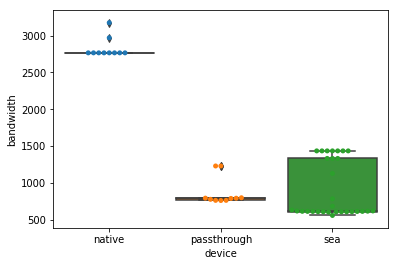

In [12]:
## WRITE BW tmpfs
df_tmpfs = df.loc[df['mount'] == 'tmpfs']
ax = sns.boxplot(x="device", y="bandwidth", data=df_tmpfs[df_tmpfs['mode'] == 'write'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_tmpfs[df_tmpfs['mode'] == 'write'], order=d_order)

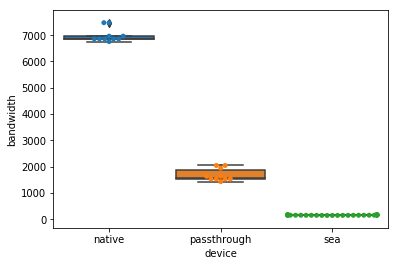

In [14]:
## READ BW TMPFS
ax = sns.boxplot(x="device", y="bandwidth", data=df_tmpfs[df_tmpfs['mode'] == 'read'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_tmpfs[df_tmpfs['mode'] == 'read'], order=d_order)

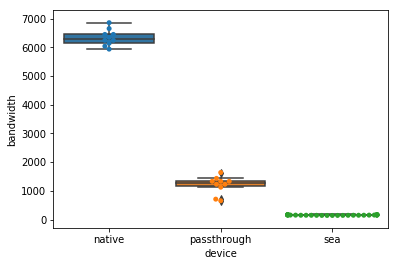

In [15]:
## CACHED READ BW TMPFS
ax = sns.boxplot(x="device", y="bandwidth", data=df_tmpfs[df_tmpfs['mode'] == 'cached'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_tmpfs[df_tmpfs['mode'] == 'cached'], order=d_order)

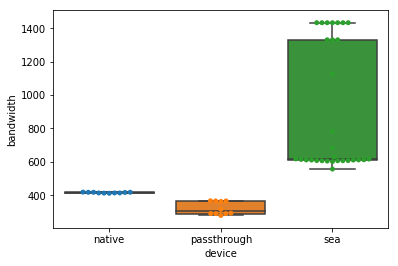

In [18]:
## WRITE BW SSD
df_ssd = df.loc[(df['mount'] == 'ssd') | (df['device'] == 'sea')]
ax = sns.boxplot(x="device", y="bandwidth", data=df_ssd[df_ssd['mode'] == 'write'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_ssd[df_ssd['mode'] == 'write'], order=d_order)

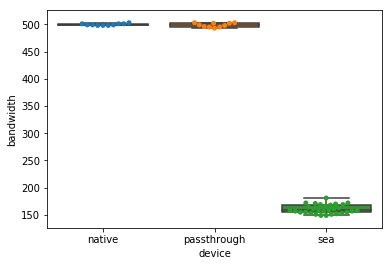

In [20]:
## READ BW SSD
ax = sns.boxplot(x="device", y="bandwidth", data=df_ssd[df_ssd['mode'] == 'read'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_ssd[df_ssd['mode'] == 'read'], order=d_order)

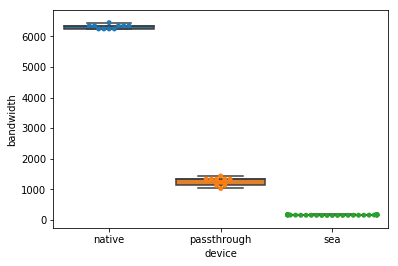

In [21]:
## CACHED READ BW SSD
ax = sns.boxplot(x="device", y="bandwidth", data=df_ssd[df_ssd['mode'] == 'cached'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_ssd[df_ssd['mode'] == 'cached'], order=d_order)

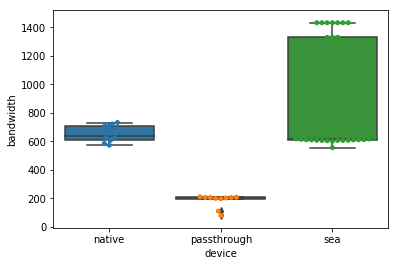

In [23]:
## WRITE BW lustre
df_lustre = df.loc[(df['mount'] == 'Lustre') | (df['device'] == 'sea')]
ax = sns.boxplot(x="device", y="bandwidth", data=df_lustre[df_lustre['mode'] == 'write'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_lustre[df_lustre['mode'] == 'write'], order=d_order)

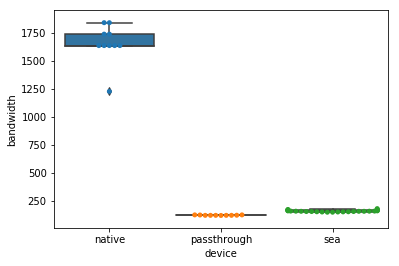

In [25]:
## READ BW lustre
ax = sns.boxplot(x="device", y="bandwidth", data=df_lustre[df_lustre['mode'] == 'read'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_lustre[df_lustre['mode'] == 'read'], order=d_order)

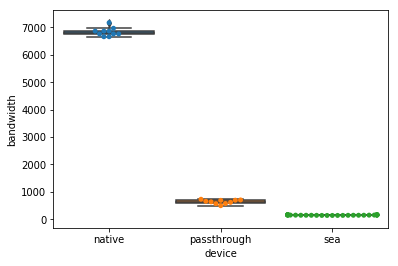

In [26]:
## CACHED READ BW lustre
ax = sns.boxplot(x="device", y="bandwidth", data=df_lustre[df_lustre['mode'] == 'cached'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_lustre[df_lustre['mode'] == 'cached'], order=d_order)